# Worksheet 12

Name:  Zhiyi Yu
UID: U65310997

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. This is a classification problem. It will be classified as offered or not offered
2. This is not a classification problem. The result will be a number 
3. This is a classification problem. The result will be 5 categories (1,2,3,4,and 5)
4. This is not a classification problem. The result is a continuous variable (number of births)

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

We can split the data set into: training set, validation set and test set. The training set will be around 60% of the dataset which is used to train the model. The validation set will be around 20% which is used to tune hyperparameters. And the test set is the unseen the data which will be used to evaluate the performance of unseen data.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting means the model is too simple to capture the patterns in the data. The signs would be it will perform poorly on both training data and testing data. 

Overfitting means the model is too complex and fits the training data perfectly. However, when it comes to the testing data, the performance will be much lower.

### K Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

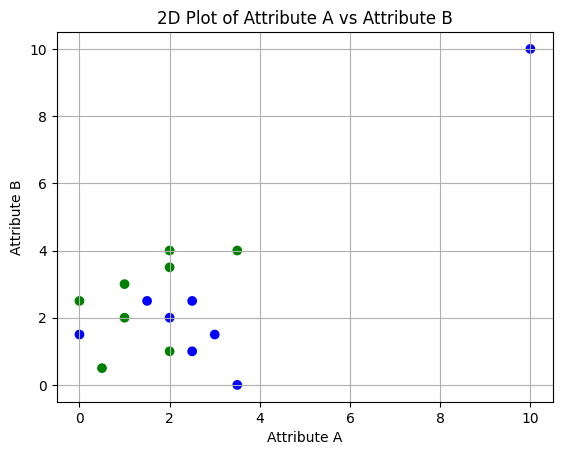

In [2]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.title('2D Plot of Attribute A vs Attribute B')
plt.grid(True)
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

By observivng the graph, we can find an outlier at the top right.

In [3]:
outlier_indices = [i for i, (a, b) in enumerate(zip(data["Attribute A"], data["Attribute B"])) if a > 8 and b > 8]

# Remove outliers 
for index in reversed(outlier_indices):  
    del data["Attribute A"][index]
    del data["Attribute B"][index]
    del data["Class"][index]

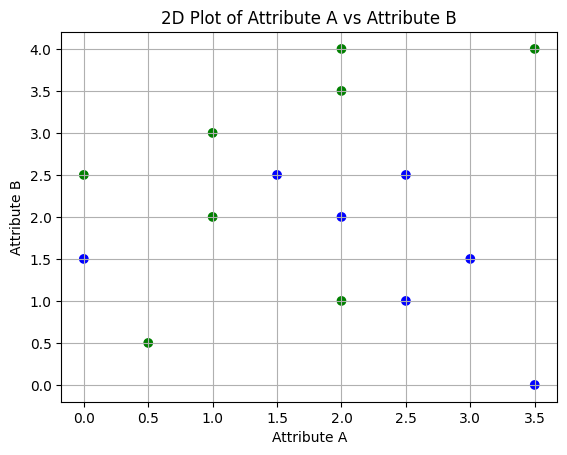

In [4]:
# plot after removing
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.title('2D Plot of Attribute A vs Attribute B')
plt.grid(True)
plt.show()

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

The green point at Attribute A = 3.5, Attribute B = 4 could be a noise point.
The blue point at Attribute A = 0.0, Attribute B = 1.5 could be a noise point.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

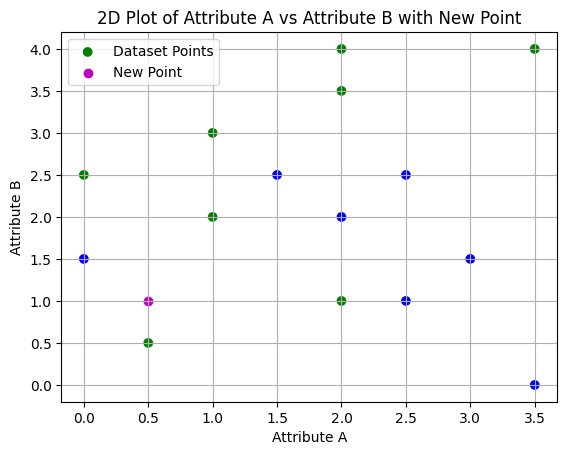

In [8]:
new_A = 0.5
new_B = 1


colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist(), label='Dataset Points')
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')

# Plot the specific point in a different color
plt.scatter(new_A, new_B, color='m', label='New Point')

plt.title('2D Plot of Attribute A vs Attribute B with New Point')
plt.grid(True)
plt.legend()
plt.show()


e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

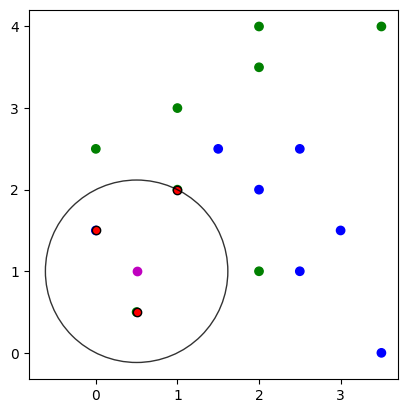

In [9]:
import numpy as np

def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def n_closest_to(example, n):
    distances = []
    for a, b in zip(data["Attribute A"], data["Attribute B"]):
        distances.append(euclidean_distance(example, (a, b)))
    sorted_indices = np.argsort(distances)
    closest_n_distances = [distances[i] for i in sorted_indices[:n]]
    return sorted_indices[:n], max(closest_n_distances)

location = (new_A, new_B)
indices, radius = n_closest_to(location, 3)

_, axes = plt.subplots()
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.scatter(new_A, new_B, color='m', label='New Point')
for index in indices:
    plt.scatter(data["Attribute A"][index], data["Attribute B"][index], color='r', edgecolor='k')  

cir = plt.Circle(location, radius, fill=False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal')  
plt.show()


f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [10]:
def majority(points):
    classes = [data["Class"][index] for index in points]
    count_0 = classes.count(0)
    count_1 = classes.count(1)
    
    if count_0 > count_1:
        return 0
    elif count_1 > count_0:
        return 1
    else:
        return 0  


indices, _ = n_closest_to((new_A, new_B), 3)
class_assigned = majority(indices)
print(f"The class assigned to the new point is: {class_assigned}")


The class assigned to the new point is: 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [11]:
count = 0


def n_closest_to_exclude(example, n, exclude_idx):
    distances = []
    for idx, (a, b) in enumerate(zip(data["Attribute A"], data["Attribute B"])):
        if idx == exclude_idx:
            continue
        distances.append(euclidean_distance(example, (a, b)))
    sorted_indices = np.argsort(distances)
    closest_n_distances = [distances[i] for i in sorted_indices[:n]]
    return sorted_indices[:n], max(closest_n_distances)

for i in range(len(data["Attribute A"])):
    test_point = (data["Attribute A"][i], data["Attribute B"][i])
    actual_class = data["Class"][i]
    
    # Use n_closest_to_exclude and majority functions to predict the class
    indices, _ = n_closest_to_exclude(test_point, 3, i)
    prediction = majority(indices)
    
    if prediction == actual_class:
        count += 1

accuracy = count / len(data["Attribute A"])
print(f"Overall accuracy = {accuracy:.2f}")


Overall accuracy = 0.60
